In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import LabelEncoder
# from keras.optimizer_v1 import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ravdess_df = pd.read_csv('/content/drive/MyDrive/combined.csv')
ravdess_df = ravdess_df.iloc[:,1:]
ravdess_df

,gender,emotion,actor,path
0,female,fear,1,/content/drive/MyDrive/TESS Toronto emotional ...
1,female,fear,1,/content/drive/MyDrive/TESS Toronto emotional ...
2,female,fear,1,/content/drive/MyDrive/TESS Toronto emotional ...
3,female,fear,1,/content/drive/MyDrive/TESS Toronto emotional ...
4,female,fear,1,/content/drive/MyDrive/TESS Toronto emotional ...
...,...,...,...,...
4235,female,fear,24,/content/drive/MyDrive/audio/Actor_24/03-01-06...
4236,female,fear,24,/content/drive/MyDrive/audio/Actor_24/03-01-06...
4237,female,angry,24,/content/drive/MyDrive/audio/Actor_24/03-01-05...
4238,female,surprise,24,/content/drive/MyDrive/audio/Actor_24/03-01-08...


In [ ]:
def extract_mfcc(wave_file_name):
  y,sr = librosa.load(wave_file_name)
  # S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
  mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
  mean_mfcc = np.mean(mfcc.T,axis=0)
  # mean_mfcc=np.hstack((mfcc,emo))
  return mean_mfcc

In [ ]:
y,sr = librosa.load('/content/drive/MyDrive/audio/Actor_01/03-01-03-01-02-02-01.wav')
# # S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
# mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
# # mean_mfcc = np.mean(mfcc,axis=1)
# mfcc[0]
emo = np.full(shape=(25,1),fill_value=1,dtype=np.int)
mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=25)
mean_mfcc=np.hstack((mfcc,emo))
mean_mfcc


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[-8.47577759e+02, -8.48061157e+02, -8.46535583e+02, ...,
        -8.52842651e+02, -8.52842651e+02,  1.00000000e+00],
       [ 7.41549921e+00,  6.73676395e+00,  8.88323021e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 7.32543182e+00,  6.66115856e+00,  8.77499390e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 8.22967052e-01,  8.06548297e-01,  7.52291799e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 6.98275626e-01,  6.56508327e-01,  5.82611740e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 6.10736787e-01,  5.38181663e-01,  4.59045440e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [ ]:
from IPython.display import Audio
y,sr = librosa.load('/content/drive/MyDrive/audio/Actor_01/03-01-06-01-01-01-01.wav')
Audio(data=y,rate=sr)

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(ravdess_df, test_size=0.2, random_state=0,
                               stratify=ravdess_df[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
print(test)

(3392, 1)
      gender  emotion  actor  \
2300  female  neutral      1   
1908  female     fear      1   
2277  female  neutral      1   
1143  female    happy      1   
577   female      sad      1   
...      ...      ...    ...   
1139  female    happy      1   
195   female     fear      1   
3144  female  neutral      6   
1570  female    angry      1   
3208    male    happy      7   

                                                   path  
2300  /content/drive/MyDrive/TESS Toronto emotional ...  
1908  /content/drive/MyDrive/TESS Toronto emotional ...  
2277  /content/drive/MyDrive/TESS Toronto emotional ...  
1143  /content/drive/MyDrive/TESS Toronto emotional ...  
577   /content/drive/MyDrive/TESS Toronto emotional ...  
...                                                 ...  
1139  /content/drive/MyDrive/TESS Toronto emotional ...  
195   /content/drive/MyDrive/TESS Toronto emotional ...  
3144  /content/drive/MyDrive/audio/Actor_06/03-01-01...  
1570  /content/drive/MyDr

In [ ]:
df = pd.DataFrame(columns=['log_spec'])
counter=0

for index,path in enumerate(train.path):
  mfcc = extract_mfcc(path)
  df.loc[counter] = [mfcc]
  counter += 1
  print(counter)
print(len(df))
# df =pd.read_csv('/content/drive/MyDrive/model/mfcc.csv')
# df = df.iloc[: , 1:]
# df

,log_spec
0,"[-507.20383, 32.65665, -14.149189, -2.398801, ..."
1,"[-424.9115, 72.836365, 13.582559, -14.813837, ..."
2,"[-662.9571, 41.473816, -18.418589, 3.3182235, ..."
3,"[-611.10657, 79.3806, 2.8244593, 16.471415, 10..."
4,"[-540.01166, 51.239983, -22.972181, 10.175825,..."
...,...
3387,"[-502.05188, 43.8599, -2.604773, 1.1265347, -5..."
3388,"[-729.59503, 70.42137, 6.7205696, 23.453606, 4..."
3389,"[-667.15466, 92.27366, 3.1087892, 20.048185, 9..."
3390,"[-347.64536, 54.039684, -15.52315, 13.06215, -..."


In [ ]:
count=0
temp = pd.Series()
for row in df['log_spec']:
  temp.loc[count] = row
  count+=1
temp

In [ ]:
# EXTRACT EMOTION LABELS FROM TRAIN
labels = pd.DataFrame(train.emotion)
labels.reset_index(drop=True, inplace=True)
labels

,emotion
0,surprise
1,fear
2,surprise
3,calm
4,happy
...,...
3387,disgust
3388,calm
3389,calm
3390,fear


In [ ]:
# ADD CORRESPONDING EMOTION LABELS TO DF['LOG_SPEC']
# type(df['log_spec'])
# mfcc_df = pd.DataFrame(df['log_spec'].values.tolist())
# mfcc = pd.concat([mfcc_df,labels], axis=1,ignore_index=True)
# mfcc = mfcc.rename(index=str, columns={40: "emotion"})
# mfcc = mfcc.iloc[:,:109]
mfcc = pd.read_csv('/content/drive/MyDrive/mfcc.csv')
mfcc = mfcc.iloc[:,1:]
print(mfcc)

              0          1          2          3          4         5  \
0    -507.20383  32.656650 -14.149189  -2.398801  -6.611685 -4.475557   
1    -424.91150  72.836365  13.582559 -14.813837 -15.483583  6.020358   
2    -662.95710  41.473816 -18.418589   3.318224 -12.977219 -7.336224   
3    -611.10657  79.380600   2.824459  16.471415  10.420895 -4.252988   
4    -540.01166  51.239983 -22.972181  10.175825   1.167942 -8.053654   
...         ...        ...        ...        ...        ...       ...   
3387 -502.05188  43.859900  -2.604773   1.126535  -5.614835 -0.265754   
3388 -729.59503  70.421370   6.720570  23.453606   4.594159  6.021837   
3389 -667.15466  92.273660   3.108789  20.048185   9.216145 -0.450933   
3390 -347.64536  54.039684 -15.523150  13.062150  -6.169755  3.703157   
3391 -295.21622  30.571106 -14.999253  29.672844  -7.821387 -7.727045   

              6          7          8         9  ...        31        32  \
0    -11.523510  -7.914782 -11.853230 -4.217081

In [ ]:
combined_df = pd.concat([mfcc], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
3387,-502.05188,43.859900,-2.604773,1.126535,-5.614835,-0.265754,-15.036654,-13.864769,-9.901254,-4.028796,...,1.853130,-1.086178,0.423127,-0.418280,3.166987,0.212238,0.325814,-1.025998,-0.498045,disgust
3388,-729.59503,70.421370,6.720570,23.453606,4.594159,6.021837,-2.202099,3.294228,0.536756,6.440284,...,1.657300,-0.365339,0.584623,0.511120,1.652351,-3.105796,-2.382192,-2.994608,-0.887968,calm
3389,-667.15466,92.273660,3.108789,20.048185,9.216145,-0.450933,-12.057720,-9.685620,1.276145,2.078562,...,-0.381134,-2.543870,-0.217840,-3.859147,-4.564312,-7.368496,-1.820121,-3.363920,-0.662408,calm
3390,-347.64536,54.039684,-15.523150,13.062150,-6.169755,3.703157,-6.078752,-11.714536,-13.542357,5.625887,...,6.362086,-2.329728,-2.529495,-9.231550,0.290030,1.129973,-1.206243,-4.214062,3.731706,fear
3391,-295.21622,30.571106,-14.999253,29.672844,-7.821387,-7.727045,-8.047218,-9.664738,-4.616383,-2.845304,...,2.911048,-3.477996,3.098792,1.807947,7.685647,0.705828,1.244122,-4.595193,-2.219147,happy


In [ ]:
X_train = combined_df.iloc[:, :-1]
y_train = combined_df.iloc[:, -1:]

In [ ]:
df = pd.DataFrame(columns=['mel_spectrogram'])
counter=0

for index,path in enumerate(test.path):
  mfcc = extract_mfcc(path)
  df.loc[counter] = [mfcc]
  counter += 1
  print(counter)
  # print ("\033[A                             \033[A")
print(len(df))
df.head()

In [ ]:
# test = test.loc[test.index.repeat(25)].reset_index(drop=True)
test.reset_index(drop=True,inplace=True)


In [ ]:
# df_combined = pd.concat([test,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
# df_combined = df_combined.fillna(0)
df_combined = pd.read_csv('/content/drive/MyDrive/mfcc_test.csv')
df_combined = df_combined.iloc[:,1:]

In [ ]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [ ]:
# CHECK TOP 5 ROWS
print(df_combined.shape)
df_combined.head()

(848, 43)


,gender,emotion,actor,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,female,neutral,1,-423.85110,72.622010,5.002045,34.543220,2.988348,-6.102084,-7.146608,...,-10.017267,1.003834,0.785221,15.430670,23.043825,32.179350,25.739586,15.907831,3.179427,-1.214063
1,female,fear,1,-275.35068,48.786465,-23.029780,23.829979,2.007111,-13.883335,-11.679904,...,-3.491931,3.237022,-0.913629,0.011729,-6.144578,1.180668,0.865935,-0.295077,-0.515710,3.326320
2,female,neutral,1,-462.33862,79.389380,28.032906,46.177563,-4.787593,0.363241,2.618909,...,-6.901717,0.561534,0.330665,10.256723,16.561417,29.265001,21.282614,19.126707,5.411518,1.594192
3,female,happy,1,-436.39105,64.843220,7.770212,-4.279943,-9.480633,7.624158,-16.362133,...,-0.448711,6.618950,-0.563480,3.798247,0.387800,6.184574,0.441807,4.829961,6.215880,11.550493
4,female,sad,1,-540.85640,80.595900,23.293245,18.689896,18.706978,14.204223,-3.318747,...,7.220472,12.138967,2.937183,5.546771,6.373443,10.849830,11.667699,12.886155,8.057577,7.176181


In [ ]:
# SEPARATE DF_COMBINED INTO X_TEST AND Y_TEST
X_test = df_combined.iloc[:, 3:]
y_test = df_combined.iloc[:,:2].drop(columns=['gender'])
# X_test.loc[0] = [-4.1287537e+02,  5.0520481e+01, -8.6483097e+00, -4.7108097e+00,
#        -1.2350923e+01,  5.4682279e+00, -1.9826475e+01, -2.2179692e+00,
#        -1.3606742e+01, -4.2214799e+00, -9.3492384e+00,  8.0879450e+00,
#        -7.9176288e+00,  1.1303248e+00, -3.7942588e+00,  1.8726997e+00,
#        -6.2138438e+00, -5.5670347e+00, -1.1563614e+01, -8.4239130e+00,
#         6.4517802e-01,  8.0211363e+00,  1.0356618e+01,  2.6925550e+01,
#         2.4552359e+01,  2.2129726e+01,  1.5090271e+01,  1.0901266e+01,
#         2.5204284e+00,  1.0641685e+01,  9.5021925e+00,  1.2646760e+01,
#         5.0759921e+00, -4.0321288e-01,  3.1849222e+00,  2.0790806e+00,
#        -2.0313420e+00,  3.7414479e+00, -3.1421704e+00,  6.7317683e-01]
print(X_test)

             0          1          2          3          4          5  \
0   -423.85110  72.622010   5.002045  34.543220   2.988348  -6.102084   
1   -275.35068  48.786465 -23.029780  23.829979   2.007111 -13.883335   
2   -462.33862  79.389380  28.032906  46.177563  -4.787593   0.363241   
3   -436.39105  64.843220   7.770212  -4.279943  -9.480633   7.624158   
4   -540.85640  80.595900  23.293245  18.689896  18.706978  14.204223   
..         ...        ...        ...        ...        ...        ...   
843 -445.29880  93.780860  16.292828  -8.900312  -1.940576  -0.654583   
844 -430.77396  72.178080  12.635900 -10.016851  -8.728482   3.783648   
845 -705.46200  52.509598 -12.874601  11.076167  -1.324863  -7.192864   
846 -323.70233  38.732285 -17.726604   8.172358 -30.097532  -2.698441   
847 -614.27765  73.949090 -10.266552  16.662582   6.028456  -0.473712   

             6          7          8         9  ...         30         31  \
0    -7.146608 -12.150572  -5.767888  3.613931

In [ ]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# np.save('/content/drive/MyDrive/mean.npy', mean)
# np.save('/content/drive/MyDrive/std.npy', std)
# mean = load('/content/drive/MyDrive/mean.npy')
# std = load('/content/drive/MyDrive/std.npy')

In [ ]:
# TURN INTO ARRAYS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ONE HOT ENCODE EMOTION LABELS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# RESHAPE TO ADD 3D TENSOR FOR 1D CNN INPUT
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_test.shape

(848, 40, 1)

In [ ]:
X_test

array([[[ 3.89391129e-01],
        [ 7.03459343e-01],
        [ 3.10691599e-01],
        ...,
        [ 1.28259507e+00],
        [ 8.59477184e-02],
        [-1.02791815e+00]],

       [[ 1.66008856e+00],
        [-4.41044435e-01],
        [-1.47489464e+00],
        ...,
        [-7.65467492e-01],
        [-4.79448835e-01],
        [-1.38415617e-01]],

       [[ 6.00587744e-02],
        [ 1.02840599e+00],
        [ 1.77772375e+00],
        ...,
        [ 1.68946398e+00],
        [ 4.27482122e-01],
        [-4.77755440e-01]],

       ...,

       [[-2.02031417e+00],
        [-2.62271942e-01],
        [-8.28024597e-01],
        ...,
        [-4.33514776e-01],
        [ 1.58925612e-01],
        [ 4.85160818e-01]],

       [[ 1.24635022e+00],
        [-9.23812795e-01],
        [-1.13709009e+00],
        ...,
        [ 1.49337760e-03],
        [-2.87181539e-01],
        [-5.86005022e-01]],

       [[-1.24006237e+00],
        [ 7.67181321e-01],
        [-6.61895692e-01],
        ...,
        

In [ ]:
from numpy import load,save
# type(X_train)
save('/content/drive/MyDrive/X_train.npy', X_train)
save('/content/drive/MyDrive/Y_train.npy', y_train)
save('/content/drive/MyDrive/X_test.npy', X_test)
save('/content/drive/MyDrive/Y_test.npy', y_test)
# X_train = load('/content/drive/MyDrive/X_train.npy')
# y_train = load('/content/drive/MyDrive/Y_train.npy')
# X_test = load('/content/drive/MyDrive/X_test.npy')
# y_test = load('/content/drive/MyDrive/Y_test.npy')

In [ ]:
model = Sequential()
model.add(LSTM(128,return_sequences=False,input_shape=(X_train.shape[1],1)))
model.add(Dense(64))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 activation_1 (Activation)   (None, 32)               

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=32, epochs=133, validation_data=(X_test, y_test),callbacks=checkpoint,shuffle=True)


Epoch 1/133
896/900 [============================>.] - ETA: 0s - loss: 2.0491 - accuracy: 0.1506
Epoch 1: val_loss improved from inf to 2.05860, saving model to face_detector.h15


900/900 [==============================] - 11s 11ms/step - loss: 2.0490 - accuracy: 0.1502 - val_loss: 2.0586 - val_accuracy: 0.1467
Epoch 2/133
896/900 [============================>.] - ETA: 0s - loss: 2.0445 - accuracy: 0.1509
Epoch 2: val_loss improved from 2.05860 to 2.05478, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0446 - accuracy: 0.1509 - val_loss: 2.0548 - val_accuracy: 0.1513
Epoch 3/133
898/900 [============================>.] - ETA: 0s - loss: 2.0433 - accuracy: 0.1551
Epoch 3: val_loss did not improve from 2.05478
900/900 [==============================] - 8s 9ms/step - loss: 2.0433 - accuracy: 0.1551 - val_loss: 2.0578 - val_accuracy: 0.1514
Epoch 4/133
898/900 [============================>.] - ETA: 0s - loss: 2.0418 - accuracy: 0.1563
Epoch 4: val_loss improved from 2.05478 to 2.05401, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0417 - accuracy: 0.1566 - val_loss: 2.0540 - val_accuracy: 0.1483
Epoch 5/133
894/900 [============================>.] - ETA: 0s - loss: 2.0389 - accuracy: 0.1591
Epoch 5: val_loss improved from 2.05401 to 2.05153, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0390 - accuracy: 0.1591 - val_loss: 2.0515 - val_accuracy: 0.1585
Epoch 6/133
894/900 [============================>.] - ETA: 0s - loss: 2.0367 - accuracy: 0.1628
Epoch 6: val_loss improved from 2.05153 to 2.04878, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0364 - accuracy: 0.1633 - val_loss: 2.0488 - val_accuracy: 0.1583
Epoch 7/133
896/900 [============================>.] - ETA: 0s - loss: 2.0355 - accuracy: 0.1642
Epoch 7: val_loss improved from 2.04878 to 2.04159, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0356 - accuracy: 0.1640 - val_loss: 2.0416 - val_accuracy: 0.1665
Epoch 8/133
898/900 [============================>.] - ETA: 0s - loss: 2.0293 - accuracy: 0.1678
Epoch 8: val_loss did not improve from 2.04159
900/900 [==============================] - 8s 9ms/step - loss: 2.0294 - accuracy: 0.1678 - val_loss: 2.0480 - val_accuracy: 0.1564
Epoch 9/133
897/900 [============================>.] - ETA: 0s - loss: 2.0240 - accuracy: 0.1717
Epoch 9: val_loss improved from 2.04159 to 2.04064, saving model to face_detector.h15


900/900 [==============================] - 10s 11ms/step - loss: 2.0239 - accuracy: 0.1720 - val_loss: 2.0406 - val_accuracy: 0.1697
Epoch 10/133
898/900 [============================>.] - ETA: 0s - loss: 2.0200 - accuracy: 0.1759
Epoch 10: val_loss improved from 2.04064 to 2.03183, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 2.0200 - accuracy: 0.1760 - val_loss: 2.0318 - val_accuracy: 0.1760
Epoch 11/133
900/900 [==============================] - ETA: 0s - loss: 2.0192 - accuracy: 0.1770
Epoch 11: val_loss did not improve from 2.03183
900/900 [==============================] - 8s 9ms/step - loss: 2.0192 - accuracy: 0.1770 - val_loss: 2.0440 - val_accuracy: 0.1597
Epoch 12/133
897/900 [============================>.] - ETA: 0s - loss: 2.0174 - accuracy: 0.1797
Epoch 12: val_loss did not improve from 2.03183
900/900 [==============================] - 8s 9ms/step - loss: 2.0175 - accuracy: 0.1798 - val_loss: 2.0346 - val_accuracy: 0.1744
Epoch 13/133
898/900 [============================>.] - ETA: 0s - loss: 2.0132 - accuracy: 0.1833
Epoch 13: val_loss improved from 2.03183 to 2.02766, saving model to face_detector.h15


900/900 [==============================] - 9s 11ms/step - loss: 2.0131 - accuracy: 0.1832 - val_loss: 2.0277 - val_accuracy: 0.1765
Epoch 14/133
897/900 [============================>.] - ETA: 0s - loss: 2.0102 - accuracy: 0.1821
Epoch 14: val_loss improved from 2.02766 to 2.02697, saving model to face_detector.h15


900/900 [==============================] - 10s 11ms/step - loss: 2.0102 - accuracy: 0.1822 - val_loss: 2.0270 - val_accuracy: 0.1768
Epoch 15/133
895/900 [============================>.] - ETA: 0s - loss: 2.0079 - accuracy: 0.1825
Epoch 15: val_loss improved from 2.02697 to 2.01884, saving model to face_detector.h15


900/900 [==============================] - 10s 11ms/step - loss: 2.0080 - accuracy: 0.1827 - val_loss: 2.0188 - val_accuracy: 0.1803
Epoch 16/133
897/900 [============================>.] - ETA: 0s - loss: 2.0018 - accuracy: 0.1872
Epoch 16: val_loss did not improve from 2.01884
900/900 [==============================] - 8s 9ms/step - loss: 2.0018 - accuracy: 0.1872 - val_loss: 2.0194 - val_accuracy: 0.1803
Epoch 17/133
898/900 [============================>.] - ETA: 0s - loss: 1.9951 - accuracy: 0.1899
Epoch 17: val_loss did not improve from 2.01884
900/900 [==============================] - 8s 9ms/step - loss: 1.9950 - accuracy: 0.1900 - val_loss: 2.0266 - val_accuracy: 0.1779
Epoch 18/133
895/900 [============================>.] - ETA: 0s - loss: 1.9909 - accuracy: 0.1942
Epoch 18: val_loss improved from 2.01884 to 2.01152, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9907 - accuracy: 0.1944 - val_loss: 2.0115 - val_accuracy: 0.1781
Epoch 19/133
895/900 [============================>.] - ETA: 0s - loss: 1.9852 - accuracy: 0.1954
Epoch 19: val_loss did not improve from 2.01152
900/900 [==============================] - 8s 8ms/step - loss: 1.9852 - accuracy: 0.1952 - val_loss: 2.0136 - val_accuracy: 0.1808
Epoch 20/133
895/900 [============================>.] - ETA: 0s - loss: 1.9834 - accuracy: 0.1984
Epoch 20: val_loss improved from 2.01152 to 2.00255, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9836 - accuracy: 0.1986 - val_loss: 2.0025 - val_accuracy: 0.1914
Epoch 21/133
896/900 [============================>.] - ETA: 0s - loss: 1.9815 - accuracy: 0.1978
Epoch 21: val_loss improved from 2.00255 to 2.00068, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9816 - accuracy: 0.1978 - val_loss: 2.0007 - val_accuracy: 0.1842
Epoch 22/133
899/900 [============================>.] - ETA: 0s - loss: 1.9766 - accuracy: 0.2011
Epoch 22: val_loss improved from 2.00068 to 1.99951, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9766 - accuracy: 0.2010 - val_loss: 1.9995 - val_accuracy: 0.1912
Epoch 23/133
900/900 [==============================] - ETA: 0s - loss: 1.9705 - accuracy: 0.2024
Epoch 23: val_loss improved from 1.99951 to 1.99450, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9705 - accuracy: 0.2024 - val_loss: 1.9945 - val_accuracy: 0.1896
Epoch 24/133
896/900 [============================>.] - ETA: 0s - loss: 1.9686 - accuracy: 0.2067
Epoch 24: val_loss improved from 1.99450 to 1.99310, saving model to face_detector.h15


900/900 [==============================] - 9s 10ms/step - loss: 1.9688 - accuracy: 0.2068 - val_loss: 1.9931 - val_accuracy: 0.1971
Epoch 25/133
334/900 [==========>...................] - ETA: 4s - loss: 1.9630 - accuracy: 0.2110

KeyboardInterrupt: ignored

In [ ]:
# BUILD 1D CNN LAYERS
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

# BUILD 1D CNN LAYERS
model = Sequential()
model.add(Conv1D(32, 8, activation='relu', padding='same',input_shape=(X_train.shape[1],1)))

model.add(Conv1D(128, 8,activation='relu',padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Conv1D(128, 8,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))
model.summary()
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 32)            288       
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 128)           32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 128)           131200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 128)          0         
 1D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('face_detector.h15', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

# FIT MODEL
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train,batch_size=16, epochs=200, validation_data=(X_test, y_test),callbacks=checkpoint)


Epoch 1/200
201/212 [===========================>..] - ETA: 0s - loss: 2.0718 - accuracy: 0.4055
Epoch 1: val_loss improved from inf to 1.60384, saving model to face_detector.h15


212/212 [==============================] - 13s 12ms/step - loss: 2.0536 - accuracy: 0.4119 - val_loss: 1.6038 - val_accuracy: 0.5908
Epoch 2/200
207/212 [============================>.] - ETA: 0s - loss: 1.5592 - accuracy: 0.5999
Epoch 2: val_loss improved from 1.60384 to 1.35469, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 1.5586 - accuracy: 0.6008 - val_loss: 1.3547 - val_accuracy: 0.6651
Epoch 3/200
204/212 [===========================>..] - ETA: 0s - loss: 1.3742 - accuracy: 0.6538
Epoch 3: val_loss improved from 1.35469 to 1.21293, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 1.3719 - accuracy: 0.6539 - val_loss: 1.2129 - val_accuracy: 0.6863
Epoch 4/200
201/212 [===========================>..] - ETA: 0s - loss: 1.2473 - accuracy: 0.6772
Epoch 4: val_loss improved from 1.21293 to 1.10927, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 1.2402 - accuracy: 0.6798 - val_loss: 1.1093 - val_accuracy: 0.6946
Epoch 5/200
201/212 [===========================>..] - ETA: 0s - loss: 1.1342 - accuracy: 0.6993
Epoch 5: val_loss improved from 1.10927 to 1.03701, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 1.1379 - accuracy: 0.6987 - val_loss: 1.0370 - val_accuracy: 0.7075
Epoch 6/200
204/212 [===========================>..] - ETA: 0s - loss: 1.0573 - accuracy: 0.7053
Epoch 6: val_loss improved from 1.03701 to 0.96926, saving model to face_detector.h15


212/212 [==============================] - 2s 12ms/step - loss: 1.0572 - accuracy: 0.7061 - val_loss: 0.9693 - val_accuracy: 0.7193
Epoch 7/200
206/212 [============================>.] - ETA: 0s - loss: 0.9810 - accuracy: 0.7233
Epoch 7: val_loss improved from 0.96926 to 0.92937, saving model to face_detector.h15


212/212 [==============================] - 2s 10ms/step - loss: 0.9828 - accuracy: 0.7217 - val_loss: 0.9294 - val_accuracy: 0.7323
Epoch 8/200
202/212 [===========================>..] - ETA: 0s - loss: 0.9364 - accuracy: 0.7330
Epoch 8: val_loss improved from 0.92937 to 0.88194, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.9342 - accuracy: 0.7335 - val_loss: 0.8819 - val_accuracy: 0.7406
Epoch 9/200
200/212 [===========================>..] - ETA: 0s - loss: 0.9037 - accuracy: 0.7322
Epoch 9: val_loss improved from 0.88194 to 0.83568, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.8978 - accuracy: 0.7341 - val_loss: 0.8357 - val_accuracy: 0.7488
Epoch 10/200
203/212 [===========================>..] - ETA: 0s - loss: 0.8729 - accuracy: 0.7300
Epoch 10: val_loss improved from 0.83568 to 0.81145, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.8718 - accuracy: 0.7305 - val_loss: 0.8114 - val_accuracy: 0.7559
Epoch 11/200
211/212 [============================>.] - ETA: 0s - loss: 0.8235 - accuracy: 0.7435
Epoch 11: val_loss improved from 0.81145 to 0.78227, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.8231 - accuracy: 0.7435 - val_loss: 0.7823 - val_accuracy: 0.7630
Epoch 12/200
199/212 [===========================>..] - ETA: 0s - loss: 0.8024 - accuracy: 0.7535
Epoch 12: val_loss improved from 0.78227 to 0.75976, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.7996 - accuracy: 0.7529 - val_loss: 0.7598 - val_accuracy: 0.7724
Epoch 13/200
209/212 [============================>.] - ETA: 0s - loss: 0.7627 - accuracy: 0.7647
Epoch 13: val_loss improved from 0.75976 to 0.73363, saving model to face_detector.h15


212/212 [==============================] - 3s 13ms/step - loss: 0.7613 - accuracy: 0.7653 - val_loss: 0.7336 - val_accuracy: 0.7665
Epoch 14/200
204/212 [===========================>..] - ETA: 0s - loss: 0.7573 - accuracy: 0.7687
Epoch 14: val_loss improved from 0.73363 to 0.72195, saving model to face_detector.h15


212/212 [==============================] - 4s 17ms/step - loss: 0.7546 - accuracy: 0.7700 - val_loss: 0.7220 - val_accuracy: 0.7677
Epoch 15/200
208/212 [============================>.] - ETA: 0s - loss: 0.7273 - accuracy: 0.7725
Epoch 15: val_loss improved from 0.72195 to 0.70384, saving model to face_detector.h15


212/212 [==============================] - 3s 14ms/step - loss: 0.7267 - accuracy: 0.7730 - val_loss: 0.7038 - val_accuracy: 0.7771
Epoch 16/200
208/212 [============================>.] - ETA: 0s - loss: 0.7116 - accuracy: 0.7779
Epoch 16: val_loss improved from 0.70384 to 0.68992, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.7111 - accuracy: 0.7777 - val_loss: 0.6899 - val_accuracy: 0.7818
Epoch 17/200
204/212 [===========================>..] - ETA: 0s - loss: 0.6805 - accuracy: 0.7806
Epoch 17: val_loss improved from 0.68992 to 0.68509, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.6858 - accuracy: 0.7789 - val_loss: 0.6851 - val_accuracy: 0.7736
Epoch 18/200
204/212 [===========================>..] - ETA: 0s - loss: 0.6712 - accuracy: 0.7892
Epoch 18: val_loss improved from 0.68509 to 0.66831, saving model to face_detector.h15


212/212 [==============================] - 2s 12ms/step - loss: 0.6732 - accuracy: 0.7883 - val_loss: 0.6683 - val_accuracy: 0.7807
Epoch 19/200
201/212 [===========================>..] - ETA: 0s - loss: 0.6624 - accuracy: 0.7858
Epoch 19: val_loss improved from 0.66831 to 0.64670, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.6603 - accuracy: 0.7866 - val_loss: 0.6467 - val_accuracy: 0.7842
Epoch 20/200
199/212 [===========================>..] - ETA: 0s - loss: 0.6589 - accuracy: 0.7908
Epoch 20: val_loss improved from 0.64670 to 0.63152, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.6508 - accuracy: 0.7942 - val_loss: 0.6315 - val_accuracy: 0.7866
Epoch 21/200
210/212 [============================>.] - ETA: 0s - loss: 0.6336 - accuracy: 0.8000
Epoch 21: val_loss improved from 0.63152 to 0.62068, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.6341 - accuracy: 0.8001 - val_loss: 0.6207 - val_accuracy: 0.7889
Epoch 22/200
203/212 [===========================>..] - ETA: 0s - loss: 0.6295 - accuracy: 0.7965
Epoch 22: val_loss improved from 0.62068 to 0.60785, saving model to face_detector.h15


212/212 [==============================] - 2s 12ms/step - loss: 0.6259 - accuracy: 0.7992 - val_loss: 0.6079 - val_accuracy: 0.7925
Epoch 23/200
209/212 [============================>.] - ETA: 0s - loss: 0.6078 - accuracy: 0.8017
Epoch 23: val_loss improved from 0.60785 to 0.59918, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.6088 - accuracy: 0.8013 - val_loss: 0.5992 - val_accuracy: 0.7901
Epoch 24/200
206/212 [============================>.] - ETA: 0s - loss: 0.5940 - accuracy: 0.8107
Epoch 24: val_loss improved from 0.59918 to 0.58883, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5942 - accuracy: 0.8116 - val_loss: 0.5888 - val_accuracy: 0.8054
Epoch 25/200
208/212 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.8086
Epoch 25: val_loss did not improve from 0.58883
212/212 [==============================] - 1s 5ms/step - loss: 0.5963 - accuracy: 0.8087 - val_loss: 0.5903 - val_accuracy: 0.8007
Epoch 26/200
201/212 [===========================>..] - ETA: 0s - loss: 0.5752 - accuracy: 0.8169
Epoch 26: val_loss improved from 0.58883 to 0.57364, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.5791 - accuracy: 0.8149 - val_loss: 0.5736 - val_accuracy: 0.8090
Epoch 27/200
201/212 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.8109
Epoch 27: val_loss improved from 0.57364 to 0.56514, saving model to face_detector.h15


212/212 [==============================] - 3s 15ms/step - loss: 0.5742 - accuracy: 0.8104 - val_loss: 0.5651 - val_accuracy: 0.8078
Epoch 28/200
199/212 [===========================>..] - ETA: 0s - loss: 0.5539 - accuracy: 0.8219
Epoch 28: val_loss improved from 0.56514 to 0.56310, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5523 - accuracy: 0.8219 - val_loss: 0.5631 - val_accuracy: 0.8019
Epoch 29/200
204/212 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.8266
Epoch 29: val_loss improved from 0.56310 to 0.55264, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5468 - accuracy: 0.8249 - val_loss: 0.5526 - val_accuracy: 0.8125
Epoch 30/200
211/212 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.8320
Epoch 30: val_loss improved from 0.55264 to 0.54796, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5357 - accuracy: 0.8323 - val_loss: 0.5480 - val_accuracy: 0.8149
Epoch 31/200
209/212 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.8292
Epoch 31: val_loss improved from 0.54796 to 0.53840, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.5377 - accuracy: 0.8302 - val_loss: 0.5384 - val_accuracy: 0.8160
Epoch 32/200
211/212 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.8383
Epoch 32: val_loss improved from 0.53840 to 0.53008, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5230 - accuracy: 0.8384 - val_loss: 0.5301 - val_accuracy: 0.8278
Epoch 33/200
199/212 [===========================>..] - ETA: 0s - loss: 0.5138 - accuracy: 0.8332
Epoch 33: val_loss improved from 0.53008 to 0.52525, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5152 - accuracy: 0.8311 - val_loss: 0.5252 - val_accuracy: 0.8231
Epoch 34/200
209/212 [============================>.] - ETA: 0s - loss: 0.5231 - accuracy: 0.8260
Epoch 34: val_loss improved from 0.52525 to 0.52089, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.5212 - accuracy: 0.8272 - val_loss: 0.5209 - val_accuracy: 0.8196
Epoch 35/200
207/212 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8379
Epoch 35: val_loss improved from 0.52089 to 0.51747, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.5056 - accuracy: 0.8379 - val_loss: 0.5175 - val_accuracy: 0.8219
Epoch 36/200
201/212 [===========================>..] - ETA: 0s - loss: 0.4876 - accuracy: 0.8486
Epoch 36: val_loss improved from 0.51747 to 0.50821, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4877 - accuracy: 0.8479 - val_loss: 0.5082 - val_accuracy: 0.8278
Epoch 37/200
209/212 [============================>.] - ETA: 0s - loss: 0.4848 - accuracy: 0.8499
Epoch 37: val_loss improved from 0.50821 to 0.50540, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4886 - accuracy: 0.8473 - val_loss: 0.5054 - val_accuracy: 0.8314
Epoch 38/200
212/212 [==============================] - ETA: 0s - loss: 0.4776 - accuracy: 0.8435
Epoch 38: val_loss improved from 0.50540 to 0.49989, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4776 - accuracy: 0.8435 - val_loss: 0.4999 - val_accuracy: 0.8302
Epoch 39/200
200/212 [===========================>..] - ETA: 0s - loss: 0.4800 - accuracy: 0.8453
Epoch 39: val_loss did not improve from 0.49989
212/212 [==============================] - 1s 5ms/step - loss: 0.4749 - accuracy: 0.8473 - val_loss: 0.5009 - val_accuracy: 0.8373
Epoch 40/200
202/212 [===========================>..] - ETA: 0s - loss: 0.4716 - accuracy: 0.8502
Epoch 40: val_loss improved from 0.49989 to 0.49009, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.4735 - accuracy: 0.8499 - val_loss: 0.4901 - val_accuracy: 0.8420
Epoch 41/200
210/212 [============================>.] - ETA: 0s - loss: 0.4620 - accuracy: 0.8583
Epoch 41: val_loss improved from 0.49009 to 0.48726, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4615 - accuracy: 0.8594 - val_loss: 0.4873 - val_accuracy: 0.8325
Epoch 42/200
212/212 [==============================] - ETA: 0s - loss: 0.4537 - accuracy: 0.8555
Epoch 42: val_loss did not improve from 0.48726
212/212 [==============================] - 1s 5ms/step - loss: 0.4537 - accuracy: 0.8555 - val_loss: 0.4890 - val_accuracy: 0.8361
Epoch 43/200
199/212 [===========================>..] - ETA: 0s - loss: 0.4584 - accuracy: 0.8518
Epoch 43: val_loss improved from 0.48726 to 0.48369, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4529 - accuracy: 0.8529 - val_loss: 0.4837 - val_accuracy: 0.8314
Epoch 44/200
205/212 [============================>.] - ETA: 0s - loss: 0.4440 - accuracy: 0.8530
Epoch 44: val_loss improved from 0.48369 to 0.46680, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4401 - accuracy: 0.8552 - val_loss: 0.4668 - val_accuracy: 0.8455
Epoch 45/200
206/212 [============================>.] - ETA: 0s - loss: 0.4377 - accuracy: 0.8580
Epoch 45: val_loss improved from 0.46680 to 0.46537, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.4354 - accuracy: 0.8603 - val_loss: 0.4654 - val_accuracy: 0.8396
Epoch 46/200
200/212 [===========================>..] - ETA: 0s - loss: 0.4364 - accuracy: 0.8578
Epoch 46: val_loss improved from 0.46537 to 0.46465, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4373 - accuracy: 0.8570 - val_loss: 0.4647 - val_accuracy: 0.8396
Epoch 47/200
200/212 [===========================>..] - ETA: 0s - loss: 0.4243 - accuracy: 0.8703
Epoch 47: val_loss improved from 0.46465 to 0.46216, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4266 - accuracy: 0.8691 - val_loss: 0.4622 - val_accuracy: 0.8479
Epoch 48/200
208/212 [============================>.] - ETA: 0s - loss: 0.4146 - accuracy: 0.8780
Epoch 48: val_loss improved from 0.46216 to 0.45858, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.4125 - accuracy: 0.8791 - val_loss: 0.4586 - val_accuracy: 0.8420
Epoch 49/200
202/212 [===========================>..] - ETA: 0s - loss: 0.4125 - accuracy: 0.8666
Epoch 49: val_loss did not improve from 0.45858
212/212 [==============================] - 1s 5ms/step - loss: 0.4086 - accuracy: 0.8688 - val_loss: 0.4593 - val_accuracy: 0.8384
Epoch 50/200
207/212 [============================>.] - ETA: 0s - loss: 0.4108 - accuracy: 0.8732
Epoch 50: val_loss improved from 0.45858 to 0.44728, saving model to face_detector.h15


212/212 [==============================] - 4s 21ms/step - loss: 0.4096 - accuracy: 0.8738 - val_loss: 0.4473 - val_accuracy: 0.8443
Epoch 51/200
208/212 [============================>.] - ETA: 0s - loss: 0.3962 - accuracy: 0.8741
Epoch 51: val_loss improved from 0.44728 to 0.44202, saving model to face_detector.h15


212/212 [==============================] - 3s 15ms/step - loss: 0.3962 - accuracy: 0.8747 - val_loss: 0.4420 - val_accuracy: 0.8573
Epoch 52/200
204/212 [===========================>..] - ETA: 0s - loss: 0.4067 - accuracy: 0.8707
Epoch 52: val_loss did not improve from 0.44202
212/212 [==============================] - 1s 5ms/step - loss: 0.4038 - accuracy: 0.8721 - val_loss: 0.4495 - val_accuracy: 0.8644
Epoch 53/200
205/212 [============================>.] - ETA: 0s - loss: 0.3877 - accuracy: 0.8784
Epoch 53: val_loss improved from 0.44202 to 0.43794, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3875 - accuracy: 0.8774 - val_loss: 0.4379 - val_accuracy: 0.8585
Epoch 54/200
211/212 [============================>.] - ETA: 0s - loss: 0.3935 - accuracy: 0.8750
Epoch 54: val_loss did not improve from 0.43794
212/212 [==============================] - 1s 5ms/step - loss: 0.3928 - accuracy: 0.8753 - val_loss: 0.4446 - val_accuracy: 0.8538
Epoch 55/200
201/212 [===========================>..] - ETA: 0s - loss: 0.3886 - accuracy: 0.8784
Epoch 55: val_loss improved from 0.43794 to 0.42905, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3845 - accuracy: 0.8803 - val_loss: 0.4291 - val_accuracy: 0.8644
Epoch 56/200
202/212 [===========================>..] - ETA: 0s - loss: 0.3710 - accuracy: 0.8846
Epoch 56: val_loss improved from 0.42905 to 0.42733, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.3708 - accuracy: 0.8844 - val_loss: 0.4273 - val_accuracy: 0.8585
Epoch 57/200
207/212 [============================>.] - ETA: 0s - loss: 0.3705 - accuracy: 0.8832
Epoch 57: val_loss did not improve from 0.42733
212/212 [==============================] - 1s 5ms/step - loss: 0.3708 - accuracy: 0.8830 - val_loss: 0.4292 - val_accuracy: 0.8597
Epoch 58/200
208/212 [============================>.] - ETA: 0s - loss: 0.3623 - accuracy: 0.8870
Epoch 58: val_loss improved from 0.42733 to 0.41327, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3602 - accuracy: 0.8874 - val_loss: 0.4133 - val_accuracy: 0.8644
Epoch 59/200
210/212 [============================>.] - ETA: 0s - loss: 0.3640 - accuracy: 0.8860
Epoch 59: val_loss did not improve from 0.41327
212/212 [==============================] - 1s 5ms/step - loss: 0.3622 - accuracy: 0.8868 - val_loss: 0.4205 - val_accuracy: 0.8573
Epoch 60/200
206/212 [============================>.] - ETA: 0s - loss: 0.3573 - accuracy: 0.8887
Epoch 60: val_loss did not improve from 0.41327
212/212 [==============================] - 1s 5ms/step - loss: 0.3557 - accuracy: 0.8897 - val_loss: 0.4140 - val_accuracy: 0.8691
Epoch 61/200
209/212 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8885
Epoch 61: val_loss did not improve from 0.41327
212/212 [==============================] - 1s 5ms/step - loss: 0.3544 - accuracy: 0.8874 - val_loss: 0.4151 - val_accuracy: 0.8738
Epoch 62/200
208/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.3364 - accuracy: 0.8968 - val_loss: 0.4055 - val_accuracy: 0.8750
Epoch 63/200
203/212 [===========================>..] - ETA: 0s - loss: 0.3384 - accuracy: 0.9006
Epoch 63: val_loss did not improve from 0.40551
212/212 [==============================] - 1s 5ms/step - loss: 0.3419 - accuracy: 0.8983 - val_loss: 0.4097 - val_accuracy: 0.8726
Epoch 64/200
210/212 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.9003
Epoch 64: val_loss improved from 0.40551 to 0.40299, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3371 - accuracy: 0.9004 - val_loss: 0.4030 - val_accuracy: 0.8691
Epoch 65/200
202/212 [===========================>..] - ETA: 0s - loss: 0.3379 - accuracy: 0.8982
Epoch 65: val_loss improved from 0.40299 to 0.40185, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3369 - accuracy: 0.8986 - val_loss: 0.4018 - val_accuracy: 0.8726
Epoch 66/200
210/212 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.9051
Epoch 66: val_loss improved from 0.40185 to 0.39334, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.3278 - accuracy: 0.9048 - val_loss: 0.3933 - val_accuracy: 0.8750
Epoch 67/200
208/212 [============================>.] - ETA: 0s - loss: 0.3255 - accuracy: 0.9035
Epoch 67: val_loss did not improve from 0.39334
212/212 [==============================] - 1s 5ms/step - loss: 0.3265 - accuracy: 0.9033 - val_loss: 0.3943 - val_accuracy: 0.8774
Epoch 68/200
212/212 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.9009
Epoch 68: val_loss did not improve from 0.39334
212/212 [==============================] - 1s 5ms/step - loss: 0.3212 - accuracy: 0.9009 - val_loss: 0.3982 - val_accuracy: 0.8691
Epoch 69/200
212/212 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.9033
Epoch 69: val_loss improved from 0.39334 to 0.38256, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3225 - accuracy: 0.9033 - val_loss: 0.3826 - val_accuracy: 0.8821
Epoch 70/200
209/212 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.9046
Epoch 70: val_loss did not improve from 0.38256
212/212 [==============================] - 1s 5ms/step - loss: 0.3079 - accuracy: 0.9042 - val_loss: 0.4226 - val_accuracy: 0.8585
Epoch 71/200
206/212 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.9059
Epoch 71: val_loss did not improve from 0.38256
212/212 [==============================] - 1s 5ms/step - loss: 0.3132 - accuracy: 0.9062 - val_loss: 0.3904 - val_accuracy: 0.8715
Epoch 72/200
203/212 [===========================>..] - ETA: 0s - loss: 0.3130 - accuracy: 0.9039
Epoch 72: val_loss did not improve from 0.38256
212/212 [==============================] - 1s 4ms/step - loss: 0.3120 - accuracy: 0.9048 - val_loss: 0.3850 - val_accuracy: 0.8750
Epoch 73/200
211/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.3055 - accuracy: 0.9098 - val_loss: 0.3802 - val_accuracy: 0.8774
Epoch 74/200
201/212 [===========================>..] - ETA: 0s - loss: 0.2990 - accuracy: 0.9117
Epoch 74: val_loss improved from 0.38024 to 0.37875, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.3018 - accuracy: 0.9095 - val_loss: 0.3787 - val_accuracy: 0.8844
Epoch 75/200
203/212 [===========================>..] - ETA: 0s - loss: 0.2974 - accuracy: 0.9101
Epoch 75: val_loss did not improve from 0.37875
212/212 [==============================] - 1s 5ms/step - loss: 0.2973 - accuracy: 0.9110 - val_loss: 0.3865 - val_accuracy: 0.8715
Epoch 76/200
201/212 [===========================>..] - ETA: 0s - loss: 0.2995 - accuracy: 0.9095
Epoch 76: val_loss improved from 0.37875 to 0.37308, saving model to face_detector.h15


212/212 [==============================] - 2s 12ms/step - loss: 0.3027 - accuracy: 0.9086 - val_loss: 0.3731 - val_accuracy: 0.8809
Epoch 77/200
208/212 [============================>.] - ETA: 0s - loss: 0.2862 - accuracy: 0.9180
Epoch 77: val_loss improved from 0.37308 to 0.36845, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.2850 - accuracy: 0.9186 - val_loss: 0.3684 - val_accuracy: 0.8809
Epoch 78/200
201/212 [===========================>..] - ETA: 0s - loss: 0.2765 - accuracy: 0.9248
Epoch 78: val_loss did not improve from 0.36845
212/212 [==============================] - 1s 5ms/step - loss: 0.2741 - accuracy: 0.9260 - val_loss: 0.3844 - val_accuracy: 0.8750
Epoch 79/200
210/212 [============================>.] - ETA: 0s - loss: 0.2804 - accuracy: 0.9217
Epoch 79: val_loss did not improve from 0.36845
212/212 [==============================] - 1s 5ms/step - loss: 0.2792 - accuracy: 0.9222 - val_loss: 0.3716 - val_accuracy: 0.8797
Epoch 80/200
205/212 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.9238
Epoch 80: val_loss did not improve from 0.36845
212/212 [==============================] - 1s 5ms/step - loss: 0.2740 - accuracy: 0.9251 - val_loss: 0.3751 - val_accuracy: 0.8738
Epoch 81/200
211/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.2656 - accuracy: 0.9228 - val_loss: 0.3595 - val_accuracy: 0.8903
Epoch 82/200
200/212 [===========================>..] - ETA: 0s - loss: 0.2628 - accuracy: 0.9269
Epoch 82: val_loss did not improve from 0.35955
212/212 [==============================] - 1s 5ms/step - loss: 0.2654 - accuracy: 0.9257 - val_loss: 0.3597 - val_accuracy: 0.8880
Epoch 83/200
199/212 [===========================>..] - ETA: 0s - loss: 0.2639 - accuracy: 0.9221
Epoch 83: val_loss did not improve from 0.35955
212/212 [==============================] - 1s 5ms/step - loss: 0.2649 - accuracy: 0.9225 - val_loss: 0.3610 - val_accuracy: 0.8821
Epoch 84/200
211/212 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.9280
Epoch 84: val_loss did not improve from 0.35955
212/212 [==============================] - 1s 5ms/step - loss: 0.2537 - accuracy: 0.9281 - val_loss: 0.3617 - val_accuracy: 0.8844
Epoch 85/200
211/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.2621 - accuracy: 0.9263 - val_loss: 0.3526 - val_accuracy: 0.8892
Epoch 87/200
200/212 [===========================>..] - ETA: 0s - loss: 0.2586 - accuracy: 0.9234
Epoch 87: val_loss did not improve from 0.35258
212/212 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.9222 - val_loss: 0.3610 - val_accuracy: 0.8809
Epoch 88/200
202/212 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.9301
Epoch 88: val_loss improved from 0.35258 to 0.34839, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.2491 - accuracy: 0.9290 - val_loss: 0.3484 - val_accuracy: 0.8915
Epoch 89/200
208/212 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.9264
Epoch 89: val_loss did not improve from 0.34839
212/212 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.9266 - val_loss: 0.3527 - val_accuracy: 0.8856
Epoch 90/200
208/212 [============================>.] - ETA: 0s - loss: 0.2403 - accuracy: 0.9306
Epoch 90: val_loss did not improve from 0.34839
212/212 [==============================] - 1s 5ms/step - loss: 0.2405 - accuracy: 0.9304 - val_loss: 0.3641 - val_accuracy: 0.8844
Epoch 91/200
209/212 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9279
Epoch 91: val_loss did not improve from 0.34839
212/212 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.9281 - val_loss: 0.3545 - val_accuracy: 0.8915
Epoch 92/200
200/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.2350 - accuracy: 0.9331 - val_loss: 0.3443 - val_accuracy: 0.8950
Epoch 93/200
210/212 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.9310
Epoch 93: val_loss did not improve from 0.34431
212/212 [==============================] - 1s 5ms/step - loss: 0.2435 - accuracy: 0.9310 - val_loss: 0.3457 - val_accuracy: 0.8856
Epoch 94/200
206/212 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9360
Epoch 94: val_loss did not improve from 0.34431
212/212 [==============================] - 1s 5ms/step - loss: 0.2320 - accuracy: 0.9363 - val_loss: 0.3457 - val_accuracy: 0.8915
Epoch 95/200
202/212 [===========================>..] - ETA: 0s - loss: 0.2465 - accuracy: 0.9335
Epoch 95: val_loss did not improve from 0.34431
212/212 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.9319 - val_loss: 0.3445 - val_accuracy: 0.8868
Epoch 96/200
204/212 [===============

212/212 [==============================] - 2s 11ms/step - loss: 0.2301 - accuracy: 0.9381 - val_loss: 0.3418 - val_accuracy: 0.8927
Epoch 97/200
202/212 [===========================>..] - ETA: 0s - loss: 0.2251 - accuracy: 0.9406
Epoch 97: val_loss did not improve from 0.34175
212/212 [==============================] - 1s 5ms/step - loss: 0.2226 - accuracy: 0.9413 - val_loss: 0.3469 - val_accuracy: 0.8986
Epoch 98/200
205/212 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9393
Epoch 98: val_loss did not improve from 0.34175
212/212 [==============================] - 1s 5ms/step - loss: 0.2245 - accuracy: 0.9396 - val_loss: 0.3548 - val_accuracy: 0.8856
Epoch 99/200
203/212 [===========================>..] - ETA: 0s - loss: 0.2262 - accuracy: 0.9406
Epoch 99: val_loss improved from 0.34175 to 0.34069, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.2259 - accuracy: 0.9410 - val_loss: 0.3407 - val_accuracy: 0.8939
Epoch 100/200
212/212 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9407
Epoch 100: val_loss improved from 0.34069 to 0.33794, saving model to face_detector.h15


212/212 [==============================] - 3s 12ms/step - loss: 0.2190 - accuracy: 0.9407 - val_loss: 0.3379 - val_accuracy: 0.8939
Epoch 101/200
200/212 [===========================>..] - ETA: 0s - loss: 0.2107 - accuracy: 0.9441
Epoch 101: val_loss improved from 0.33794 to 0.33125, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.2105 - accuracy: 0.9440 - val_loss: 0.3312 - val_accuracy: 0.8915
Epoch 102/200
202/212 [===========================>..] - ETA: 0s - loss: 0.2162 - accuracy: 0.9412
Epoch 102: val_loss did not improve from 0.33125
212/212 [==============================] - 1s 5ms/step - loss: 0.2152 - accuracy: 0.9407 - val_loss: 0.3375 - val_accuracy: 0.8939
Epoch 103/200
209/212 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9432
Epoch 103: val_loss did not improve from 0.33125
212/212 [==============================] - 1s 5ms/step - loss: 0.2061 - accuracy: 0.9425 - val_loss: 0.3346 - val_accuracy: 0.8939
Epoch 104/200
202/212 [===========================>..] - ETA: 0s - loss: 0.2086 - accuracy: 0.9428
Epoch 104: val_loss improved from 0.33125 to 0.32403, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.2069 - accuracy: 0.9431 - val_loss: 0.3240 - val_accuracy: 0.8986
Epoch 105/200
211/212 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9496
Epoch 105: val_loss did not improve from 0.32403
212/212 [==============================] - 1s 5ms/step - loss: 0.2006 - accuracy: 0.9499 - val_loss: 0.3308 - val_accuracy: 0.8998
Epoch 106/200
209/212 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9441
Epoch 106: val_loss did not improve from 0.32403
212/212 [==============================] - 1s 5ms/step - loss: 0.2097 - accuracy: 0.9446 - val_loss: 0.3333 - val_accuracy: 0.8998
Epoch 107/200
206/212 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9518
Epoch 107: val_loss improved from 0.32403 to 0.31837, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.1953 - accuracy: 0.9522 - val_loss: 0.3184 - val_accuracy: 0.8986
Epoch 108/200
207/212 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9484
Epoch 108: val_loss did not improve from 0.31837
212/212 [==============================] - 1s 5ms/step - loss: 0.1930 - accuracy: 0.9484 - val_loss: 0.3255 - val_accuracy: 0.8939
Epoch 109/200
208/212 [============================>.] - ETA: 0s - loss: 0.1957 - accuracy: 0.9486
Epoch 109: val_loss did not improve from 0.31837
212/212 [==============================] - 1s 5ms/step - loss: 0.1966 - accuracy: 0.9484 - val_loss: 0.3400 - val_accuracy: 0.8844
Epoch 110/200
206/212 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9481
Epoch 110: val_loss did not improve from 0.31837
212/212 [==============================] - 1s 5ms/step - loss: 0.1979 - accuracy: 0.9490 - val_loss: 0.3291 - val_accuracy: 0.8939
Epoch 111/200
202/212 [========

212/212 [==============================] - 3s 12ms/step - loss: 0.1878 - accuracy: 0.9549 - val_loss: 0.3159 - val_accuracy: 0.9009
Epoch 116/200
208/212 [============================>.] - ETA: 0s - loss: 0.1796 - accuracy: 0.9543
Epoch 116: val_loss improved from 0.31594 to 0.31452, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.1786 - accuracy: 0.9546 - val_loss: 0.3145 - val_accuracy: 0.9009
Epoch 117/200
202/212 [===========================>..] - ETA: 0s - loss: 0.1825 - accuracy: 0.9554
Epoch 117: val_loss did not improve from 0.31452
212/212 [==============================] - 1s 5ms/step - loss: 0.1832 - accuracy: 0.9555 - val_loss: 0.3153 - val_accuracy: 0.8974
Epoch 118/200
212/212 [==============================] - ETA: 0s - loss: 0.1736 - accuracy: 0.9581
Epoch 118: val_loss did not improve from 0.31452
212/212 [==============================] - 1s 5ms/step - loss: 0.1736 - accuracy: 0.9581 - val_loss: 0.3196 - val_accuracy: 0.8986
Epoch 119/200
208/212 [============================>.] - ETA: 0s - loss: 0.1780 - accuracy: 0.9558
Epoch 119: val_loss did not improve from 0.31452
212/212 [==============================] - 1s 5ms/step - loss: 0.1774 - accuracy: 0.9558 - val_loss: 0.3170 - val_accuracy: 0.9057
Epoch 120/200
206/212 [========

212/212 [==============================] - 2s 11ms/step - loss: 0.1655 - accuracy: 0.9602 - val_loss: 0.3099 - val_accuracy: 0.8986
Epoch 121/200
201/212 [===========================>..] - ETA: 0s - loss: 0.1713 - accuracy: 0.9605
Epoch 121: val_loss did not improve from 0.30986
212/212 [==============================] - 1s 5ms/step - loss: 0.1689 - accuracy: 0.9605 - val_loss: 0.3182 - val_accuracy: 0.9057
Epoch 122/200
210/212 [============================>.] - ETA: 0s - loss: 0.1688 - accuracy: 0.9565
Epoch 122: val_loss improved from 0.30986 to 0.30330, saving model to face_detector.h15


212/212 [==============================] - 4s 17ms/step - loss: 0.1685 - accuracy: 0.9570 - val_loss: 0.3033 - val_accuracy: 0.9057
Epoch 123/200
209/212 [============================>.] - ETA: 0s - loss: 0.1662 - accuracy: 0.9602
Epoch 123: val_loss did not improve from 0.30330
212/212 [==============================] - 2s 7ms/step - loss: 0.1665 - accuracy: 0.9599 - val_loss: 0.3254 - val_accuracy: 0.9033
Epoch 124/200
209/212 [============================>.] - ETA: 0s - loss: 0.1724 - accuracy: 0.9572
Epoch 124: val_loss did not improve from 0.30330
212/212 [==============================] - 2s 8ms/step - loss: 0.1714 - accuracy: 0.9575 - val_loss: 0.3165 - val_accuracy: 0.9045
Epoch 125/200
203/212 [===========================>..] - ETA: 0s - loss: 0.1716 - accuracy: 0.9566
Epoch 125: val_loss did not improve from 0.30330
212/212 [==============================] - 1s 5ms/step - loss: 0.1729 - accuracy: 0.9561 - val_loss: 0.3055 - val_accuracy: 0.9068
Epoch 126/200
208/212 [========

212/212 [==============================] - 3s 12ms/step - loss: 0.1401 - accuracy: 0.9685 - val_loss: 0.2957 - val_accuracy: 0.9104
Epoch 140/200
204/212 [===========================>..] - ETA: 0s - loss: 0.1424 - accuracy: 0.9697
Epoch 140: val_loss did not improve from 0.29572
212/212 [==============================] - 1s 5ms/step - loss: 0.1435 - accuracy: 0.9690 - val_loss: 0.3130 - val_accuracy: 0.9057
Epoch 141/200
207/212 [============================>.] - ETA: 0s - loss: 0.1520 - accuracy: 0.9641
Epoch 141: val_loss did not improve from 0.29572
212/212 [==============================] - 1s 5ms/step - loss: 0.1520 - accuracy: 0.9640 - val_loss: 0.3014 - val_accuracy: 0.9175
Epoch 142/200
210/212 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9702
Epoch 142: val_loss did not improve from 0.29572
212/212 [==============================] - 1s 5ms/step - loss: 0.1323 - accuracy: 0.9702 - val_loss: 0.3189 - val_accuracy: 0.9021
Epoch 143/200
202/212 [========

212/212 [==============================] - 2s 11ms/step - loss: 0.1330 - accuracy: 0.9688 - val_loss: 0.2948 - val_accuracy: 0.9163
Epoch 147/200
202/212 [===========================>..] - ETA: 0s - loss: 0.1345 - accuracy: 0.9684
Epoch 147: val_loss did not improve from 0.29476
212/212 [==============================] - 1s 5ms/step - loss: 0.1341 - accuracy: 0.9685 - val_loss: 0.3068 - val_accuracy: 0.9092
Epoch 148/200
203/212 [===========================>..] - ETA: 0s - loss: 0.1362 - accuracy: 0.9692
Epoch 148: val_loss did not improve from 0.29476
212/212 [==============================] - 1s 5ms/step - loss: 0.1363 - accuracy: 0.9690 - val_loss: 0.3073 - val_accuracy: 0.9033
Epoch 149/200
202/212 [===========================>..] - ETA: 0s - loss: 0.1251 - accuracy: 0.9731
Epoch 149: val_loss did not improve from 0.29476
212/212 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.9726 - val_loss: 0.2950 - val_accuracy: 0.9139
Epoch 150/200
203/212 [========

212/212 [==============================] - 2s 11ms/step - loss: 0.1281 - accuracy: 0.9746 - val_loss: 0.2922 - val_accuracy: 0.9104
Epoch 155/200
205/212 [============================>.] - ETA: 0s - loss: 0.1212 - accuracy: 0.9735
Epoch 155: val_loss improved from 0.29220 to 0.28581, saving model to face_detector.h15


212/212 [==============================] - 2s 11ms/step - loss: 0.1221 - accuracy: 0.9732 - val_loss: 0.2858 - val_accuracy: 0.9151
Epoch 156/200
207/212 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9731
Epoch 156: val_loss did not improve from 0.28581
212/212 [==============================] - 1s 5ms/step - loss: 0.1293 - accuracy: 0.9735 - val_loss: 0.3075 - val_accuracy: 0.9033
Epoch 157/200
207/212 [============================>.] - ETA: 0s - loss: 0.1223 - accuracy: 0.9734
Epoch 157: val_loss did not improve from 0.28581
212/212 [==============================] - 1s 5ms/step - loss: 0.1213 - accuracy: 0.9738 - val_loss: 0.3006 - val_accuracy: 0.9057
Epoch 158/200
204/212 [===========================>..] - ETA: 0s - loss: 0.1218 - accuracy: 0.9746
Epoch 158: val_loss did not improve from 0.28581
212/212 [==============================] - 1s 5ms/step - loss: 0.1219 - accuracy: 0.9746 - val_loss: 0.2895 - val_accuracy: 0.9139
Epoch 159/200
208/212 [========

212/212 [==============================] - 3s 12ms/step - loss: 0.1020 - accuracy: 0.9788 - val_loss: 0.2786 - val_accuracy: 0.9281
Epoch 178/200
206/212 [============================>.] - ETA: 0s - loss: 0.1036 - accuracy: 0.9788
Epoch 178: val_loss did not improve from 0.27856
212/212 [==============================] - 1s 5ms/step - loss: 0.1036 - accuracy: 0.9785 - val_loss: 0.2834 - val_accuracy: 0.9127
Epoch 179/200
206/212 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9800
Epoch 179: val_loss did not improve from 0.27856
212/212 [==============================] - 1s 5ms/step - loss: 0.0994 - accuracy: 0.9797 - val_loss: 0.3022 - val_accuracy: 0.9175
Epoch 180/200
209/212 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9791
Epoch 180: val_loss did not improve from 0.27856
212/212 [==============================] - 1s 5ms/step - loss: 0.0987 - accuracy: 0.9794 - val_loss: 0.2984 - val_accuracy: 0.9104
Epoch 181/200
203/212 [========

In [ ]:
# model.save_weights("/content/drive/MyDrive/model/best_model_weights.h5")
# model.save('/content/drive/MyDrive/model/best_model.h5')
# print("Saved model to disk")
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.regularizers import l2

# # BUILD 1D CNN LAYERS
model = keras.models.load_model('/content/drive/MyDrive/model/best_model.h5')


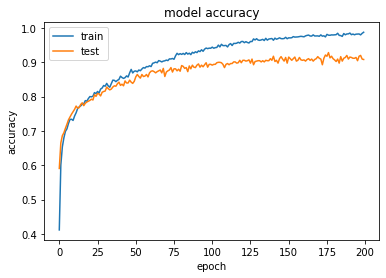

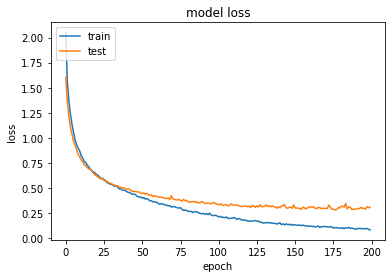

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
# PREDICTION LABELS
# model = tf.keras.models.load_model('/home/adarsh/Downloads/best_model.h5')
# model.load_weights('/home/adarsh/Downloads/best_model_weights.h5')
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})
# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})
predictions
# # COMBINE PREDICTION AND ACTUAL LABELS
pred = pd.concat([predictions,actual],axis=1,ignore_index=True)
pred
# # # predictions
# # actual

27/27 [==============================] - 1s 10ms/step


,0,1
0,neutral,neutral
1,fear,fear
2,neutral,neutral
3,happy,happy
4,sad,sad
...,...,...
843,happy,happy
844,fear,fear
845,neutral,neutral
846,angry,angry


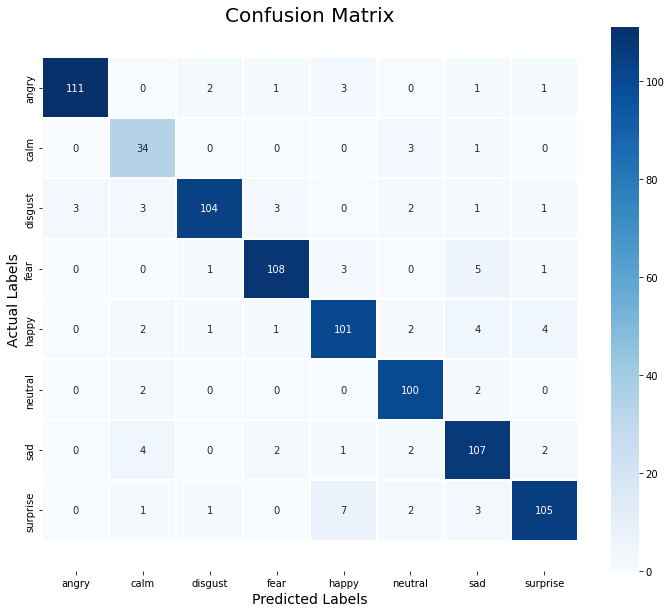

In [ ]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Augmented_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
from IPython.display import Audio
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb') as f:
    f.write(b)
  return 'audio.wav' 
record(4)
x1,sr1 = librosa.load('/content/drive/MyDrive/zAjJYkUnTEs_160.wav')
Audio(data=x1,rate=sr1)

In [ ]:
test_aud = extract_mfcc('/content/drive/MyDrive/zAjJYkUnTEs_160.wav')
test_aud
# mean = np.mean(test_aud,axis=0)
# std = np.std(test_aud,axis=0)
test_auddf = (test_aud-mean)/std
test_auddf = np.array([test_auddf])
test_auddf
test_auddf = test_auddf[:,:,np.newaxis]
test_auddf
# livedf2= pd.DataFrame(data=test_auddf)
# livedf2 = livedf2.stack().to_frame().T
# twodim= np.expand_dims(livedf2, axis=2)

array([[[ 2.72527023],
        [ 1.16438384],
        [-4.32883747],
        [ 0.13429235],
        [-0.64291901],
        [-0.78333992],
        [-1.40138036],
        [ 1.4225936 ],
        [-1.30628537],
        [-1.89921331],
        [-0.61054812],
        [-1.03457022],
        [-1.41601823],
        [-0.73403843],
        [-1.10739089],
        [ 0.79688795],
        [-2.22294005],
        [-0.4722919 ],
        [-0.73640322],
        [-0.09364983],
        [-1.21911745],
        [-0.16858645],
        [-0.4212943 ],
        [-0.23124067],
        [-0.65634   ],
        [-0.45583578],
        [-0.843504  ],
        [-0.60331759],
        [-0.78901621],
        [-0.42054673],
        [-0.70794029],
        [-0.14165978],
        [-0.31454498],
        [-0.34930673],
        [-0.88570694],
        [-0.7380118 ],
        [-0.78194274],
        [-0.63023345],
        [-0.55305104],
        [-0.57845227]]])

In [ ]:

predictions = model.predict(test_auddf,batch_size=1)
predictions=predictions.argmax(axis=1)
predictions

predictions = predictions.astype(int).flatten()
predictions
# predictions = (lb.inverse_transform((predictions)))
# predictions

1/1 [==============================] - 0s 23ms/step


array([0])